In [1]:
import numpy as np
import pandas as pd
import tweepy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ACCESS_TOKEN = '1230902594136084480-H4G2asyYOPsDoEAr9yDUNTaq6hZcOW'
ACCESS_SECRET = 'vXESwd7kUW0nwlsPIMld8SEBYZcqEUMCjGqB5efzH8YHL'
CONSUMER_KEY = 'dAiFKkSETLHJFXsVYzKaAzeCd'
CONSUMER_SECRET = '5iZEJ101m0FfdXP4e02waVDr7UwBuFwOYgiwrMtgczLSQljohQ'

# screen_name = 'realdonaldtrump'
# startDate = datetime.date(2019, 1, 1)
# endDate = datetime.date(2019, 12, 31)


def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [3]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump",
                                 count=200, exlude_replies=1, include_rts=0)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

Number of tweets extracted: 86.

5 recent tweets:

LIGHT AT THE END OF THE TUNNEL!

USA STRONG!

Thank you Gayle. I only wish the public could fully understand how corrupt &amp; dishonest so much of our Lamestream Me… https://t.co/tNgx4h7pda

For humanitarian reasons, the passengers from the two CoronaVirus stricken cruise ships have been given medical tre… https://t.co/SO7dBO2aEn

.@gayletrotter  “To this day the establishment media have not admitted that they were wrong and the President was right.” @FoxNews



In [4]:
display(data.head(10))

,Tweets
0,LIGHT AT THE END OF THE TUNNEL!
1,USA STRONG!
2,Thank you Gayle. I only wish the public could ...
3,"For humanitarian reasons, the passengers from ..."
4,.@gayletrotter “To this day the establishment...
5,https://t.co/j8fKN49P1o
6,https://t.co/hUVUJb9zSA
7,White House news conference at 6:45 P.M. Easte...
8,We are learning much about the Invisible Enemy...
9,Thank you Gayle! https://t.co/DN4DDoHPtu


In [5]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [7]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,LIGHT AT THE END OF THE TUNNEL!,31,1247130744260083712,2020-04-06 11:55:14,Twitter for iPhone,51013,11570
1,USA STRONG!,11,1247130573010845708,2020-04-06 11:54:33,Twitter for iPhone,41664,8523
2,Thank you Gayle. I only wish the public could ...,144,1247130183477460992,2020-04-06 11:53:00,Twitter for iPhone,15255,4329
3,"For humanitarian reasons, the passengers from ...",140,1247129414485397504,2020-04-06 11:49:57,Twitter for iPhone,19760,4235
4,.@gayletrotter “To this day the establishment...,130,1247127098797539329,2020-04-06 11:40:45,Twitter for iPhone,22070,4999
5,https://t.co/j8fKN49P1o,23,1246963819357880320,2020-04-06 00:51:56,Twitter for iPhone,48856,10854
6,https://t.co/hUVUJb9zSA,23,1246963794124865537,2020-04-06 00:51:50,Twitter for iPhone,42306,9292
7,White House news conference at 6:45 P.M. Easte...,60,1246925577967357953,2020-04-05 22:19:59,Twitter for iPhone,92543,14617
8,We are learning much about the Invisible Enemy...,102,1246884203419099137,2020-04-05 19:35:34,Twitter for iPhone,315063,54314
9,Thank you Gayle! https://t.co/DN4DDoHPtu,40,1246837639111729153,2020-04-05 16:30:32,Twitter for iPhone,53917,13382


In [8]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 93.1046511627907


In [9]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with most likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with most retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with most likes is: 
I am a great friend and admirer of the Queen &amp; the United Kingdom. It was reported that Harry and Meghan, who left… https://t.co/93TLGOURbX
Number of likes: 538160
143 characters.

The tweet with most retweets is: 
I am a great friend and admirer of the Queen &amp; the United Kingdom. It was reported that Harry and Meghan, who left… https://t.co/93TLGOURbX
Number of retweets: 99629
143 characters.



In [10]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

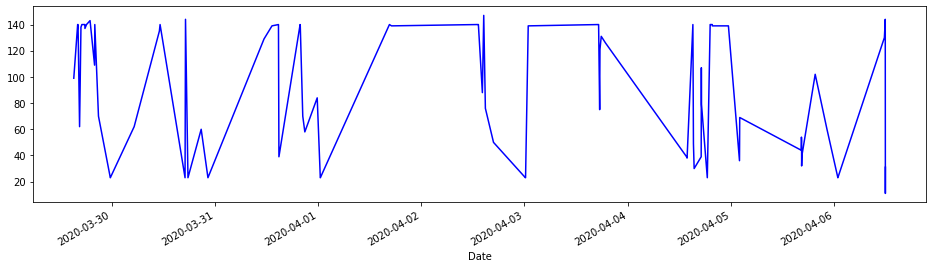

In [11]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='b');

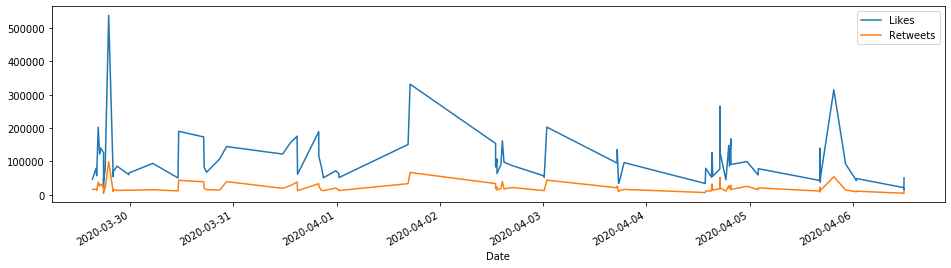

In [12]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [13]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


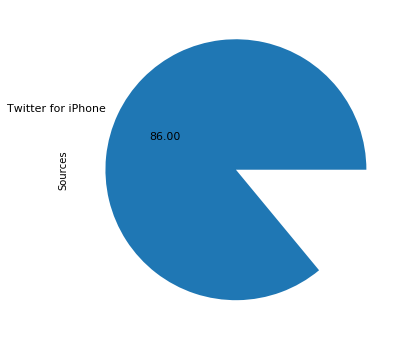

In [14]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [15]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [16]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,LIGHT AT THE END OF THE TUNNEL!,31,1247130744260083712,2020-04-06 11:55:14,Twitter for iPhone,51013,11570,1
1,USA STRONG!,11,1247130573010845708,2020-04-06 11:54:33,Twitter for iPhone,41664,8523,1
2,Thank you Gayle. I only wish the public could ...,144,1247130183477460992,2020-04-06 11:53:00,Twitter for iPhone,15255,4329,-1
3,"For humanitarian reasons, the passengers from ...",140,1247129414485397504,2020-04-06 11:49:57,Twitter for iPhone,19760,4235,0
4,.@gayletrotter “To this day the establishment...,130,1247127098797539329,2020-04-06 11:40:45,Twitter for iPhone,22070,4999,-1
5,https://t.co/j8fKN49P1o,23,1246963819357880320,2020-04-06 00:51:56,Twitter for iPhone,48856,10854,0
6,https://t.co/hUVUJb9zSA,23,1246963794124865537,2020-04-06 00:51:50,Twitter for iPhone,42306,9292,0
7,White House news conference at 6:45 P.M. Easte...,60,1246925577967357953,2020-04-05 22:19:59,Twitter for iPhone,92543,14617,0
8,We are learning much about the Invisible Enemy...,102,1246884203419099137,2020-04-05 19:35:34,Twitter for iPhone,315063,54314,1
9,Thank you Gayle! https://t.co/DN4DDoHPtu,40,1246837639111729153,2020-04-05 16:30:32,Twitter for iPhone,53917,13382,0


In [17]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [19]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 45.348837209302324%
Percentage of neutral tweets: 37.2093023255814%
Percentage of negative tweets: 17.441860465116278%
